In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.interpolate import interp1d	
from logistics_2 import run_simulation,observable,fft_matrix
from logistics_exact_cavity import two_modes_cavity

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['font.size'] = 14  

1. consistency check, ¿me he equivocado? usar el Rabi model para comparar 
2. probar formas de solucionar la inestabilidad 

	2.1 deshacer RWA 

	2.2 porbar alternativas algebraicas 

	2.3 Introducir leakege ($\eta$ )

# 1. Consistency check. 

first, let me use the code I already have and check that everything is consistent. 

In [2]:
def exp000(gamma,tau,phi,Omega,plot=True):
	t_max = 150*tau
	dt = tau/150
	initial=[0,1]

	omega_1 = 0
	omega_2 = 2*np.pi
	g = np.sqrt(gamma/tau)
	t,e,a,s= run_simulation(gamma,tau,phi,Omega,t_max,dt,initial)
	I = observable(a,initial)
	exact5=two_modes_cavity(phi/tau,omega_1,omega_2, g,g,Omega,phi/tau,4,start_ground=True)
	pe_exact,m1,m2,mtot=exact5.evolve(t)

	if plot==True:
		fig,axs = plt.subplots(1,2,figsize=(12,5))

		axs[0].plot(t/tau,e,label='our model')
		axs[0].plot(t/tau,pe_exact,'r--',label='Jaynes-Cummings')
		axs[0].set_xlabel(r"$t/\tau $")
		axs[0].set_title(rf"$ \langle \sigma^+ \sigma^- \rangle $ ")
		axs[0].grid()

		axs[1].set_title(r"$ \langle a^{\dag}_{out}a_{out}\rangle(t) $")
		axs[1].plot(t/tau,I,label='our model')
		axs[1].plot(t/tau,m1+m2,'r--',label='Jaynes-Cummings 1 ')
		axs[1].plot(t/tau,mtot,'g--',label='Jaynes-Cummings 2')
		axs[1].legend()
		axs[1].set_xlabel(r"$t/\tau $")
		axs[1].grid()

		fig.suptitle(rf"$\phi = {phi/np.pi:.2f} \pi, \gamma \tau = {gamma*tau:.2f}$ , $\Omega = {Omega/gamma:.1f} \gamma $", fontsize=14)

		plt.show()
	return t,e,a,s

I don't know why, with $\phi = \pi $ the population of the excited state is consistent, but the output field drifts much faster 

In [94]:
# --- our model-----
gamma = 0.02 
tau = 1
phi = 2*np.pi 
Omega=0
initial=[1,0]
# --- two-mode cavity-----
g=np.sqrt(gamma/tau)
om1=0
om2=2*np.pi 
om_e=phi/tau
om_laser=om_e
# --- time-----
t_max = 100*tau
dt=tau/75



In [106]:
t,e,a,s= run_simulation(gamma,tau,phi,Omega,t_max,dt,initial)
e_sigma=s[:,2]
I = observable(a,initial)

In [113]:
tmc=two_modes_cavity(om_e,om1,om2,g,g,Omega,om_e,4)

vec=tmc.evolve(t)

sigma_minus=tmc.sigma_minus
b1 = tmc.b1 
b1_dag = np.conjugate(b1.T)
b2 = tmc.b2 
b2_dag = np.conjugate(b2.T)
b = b1+b2
b_dag = b1_dag+b2_dag

e_exact=tmc.probability_excited(vec)
e_sigma_exact= np.einsum('ti,ij,tj->t',np.conjugate(vec),sigma_minus,vec)
I_exact = np.einsum('ti,ij,tj->t',np.conjugate(vec),b_dag@b,vec)
I1_exact = np.einsum('ti,ij,tj->t',np.conjugate(vec),b1_dag@b1,vec)
I2_exact = np.einsum('ti,ij,tj->t',np.conjugate(vec),b2_dag@b2,vec)

In [122]:
sigma_minus[:,2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

c:\Users\cbara\Documents\python_projects\Non\.venv\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\cbara\Documents\python_projects\Non\.venv\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


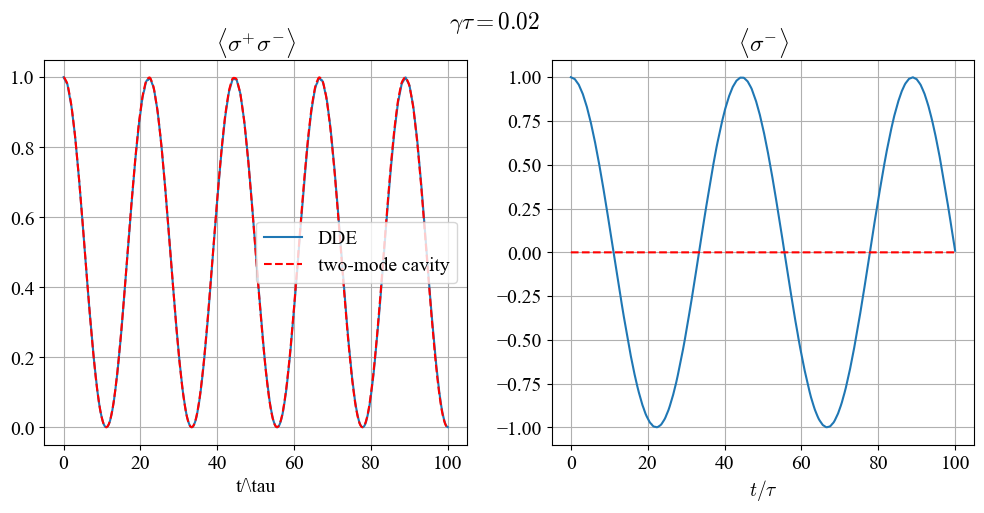

In [115]:
fig,axs = plt.subplots(1,2,figsize=(12,5))
axs[0].set_xlabel(r"t/\tau")
axs[0].set_title(r"$\langle \sigma^{+}\sigma^{-} \rangle$")
axs[0].plot(t,e,label='DDE')
axs[0].plot(t,e_exact,'r--',label='two-mode cavity')
axs[0].grid()
axs[0].legend()

axs[1].plot(t,e_sigma,label='DDE')
axs[1].plot(t,np.imag(e_sigma_exact),'r--',label='two-mode cavity')
axs[1].set_xlabel(r"$t/\tau$")
axs[1].grid()
axs[1].set_title(r"$ \langle \sigma^{-}\rangle $")

fig.suptitle(rf"$\gamma \tau = {gamma*tau} $")

plt.show()

(0.0, 10.0)

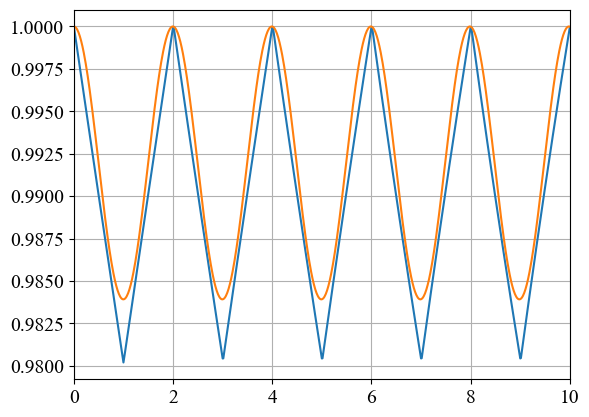

In [93]:
plt.plot(t,np.abs(e))
plt.plot(t,np.abs(e_exact))
plt.grid()
plt.xlim(0,10)

## 1.1 $\phi $ fixed 

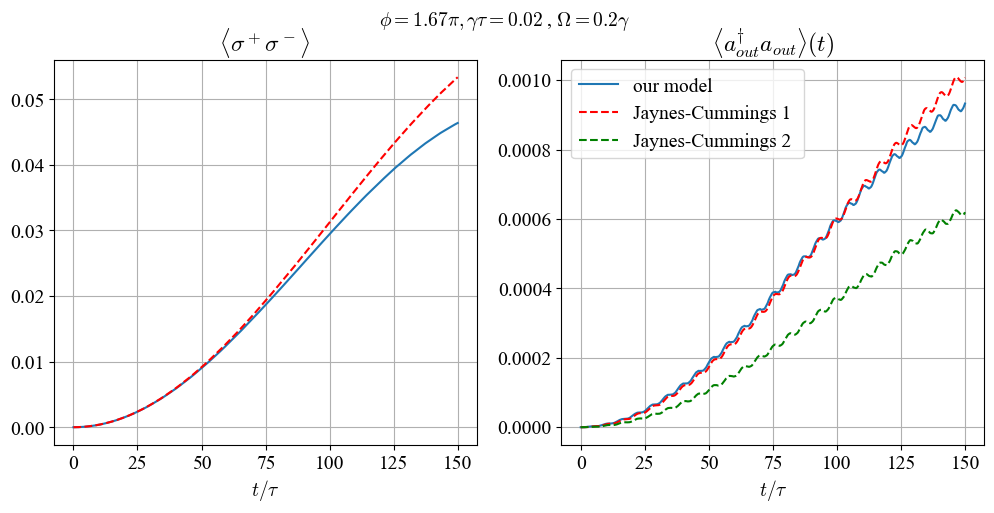

In [3]:
gamma = 0.02
tau = 1 
phi = 1.67*np.pi
Omega = gamma/5

t,e,a,s=exp000(gamma,tau,phi,Omega)

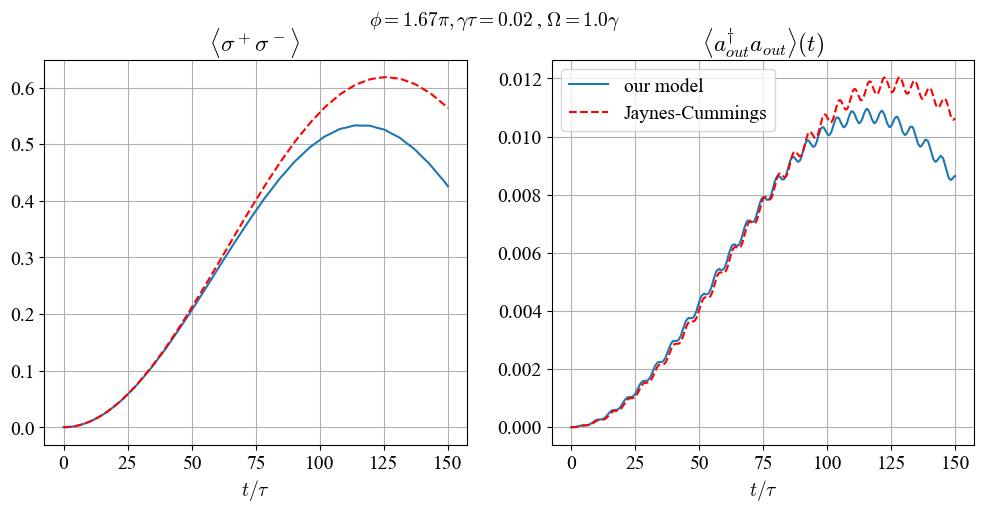

In [113]:
gamma = 0.02
tau = 1 
phi = 1.67*np.pi
Omega = gamma

_=exp000(gamma,tau,phi,Omega)

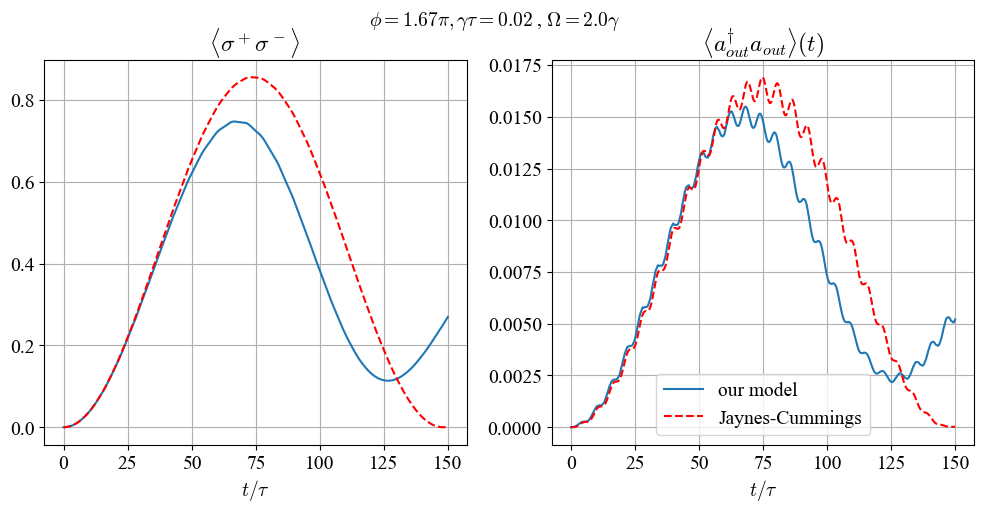

In [111]:
gamma = 0.02
tau = 1 
phi = 1.67*np.pi
Omega = gamma*2

_=exp000(gamma,tau,phi,Omega)

## 1.2 $ \Omega $ fixed 

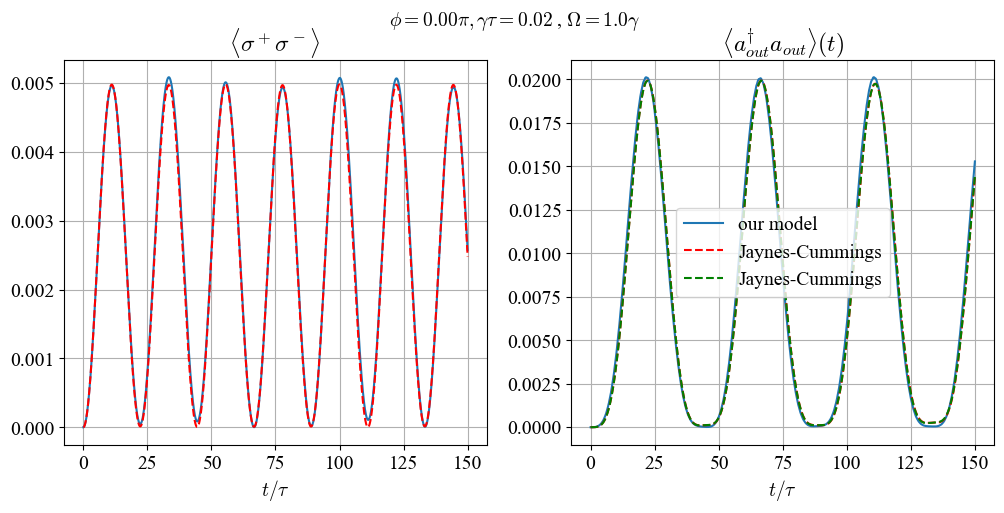

In [17]:
gamma = 0.02
tau = 1 
phi = 0*np.pi
Omega = gamma

_=exp000(gamma,tau,phi,Omega)

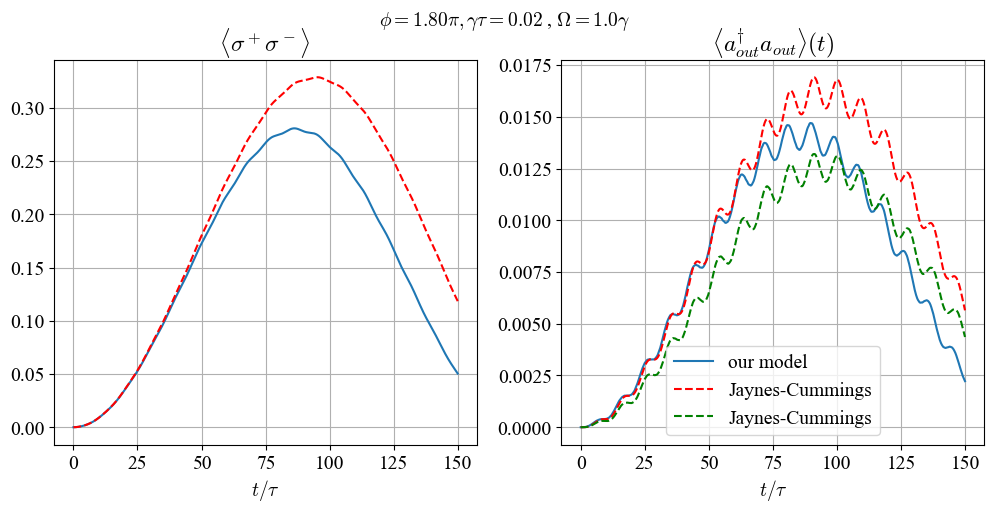

In [18]:
gamma = 0.02
tau = 1 
phi = 1.8*np.pi
Omega = gamma

_=exp000(gamma,tau,phi,Omega)

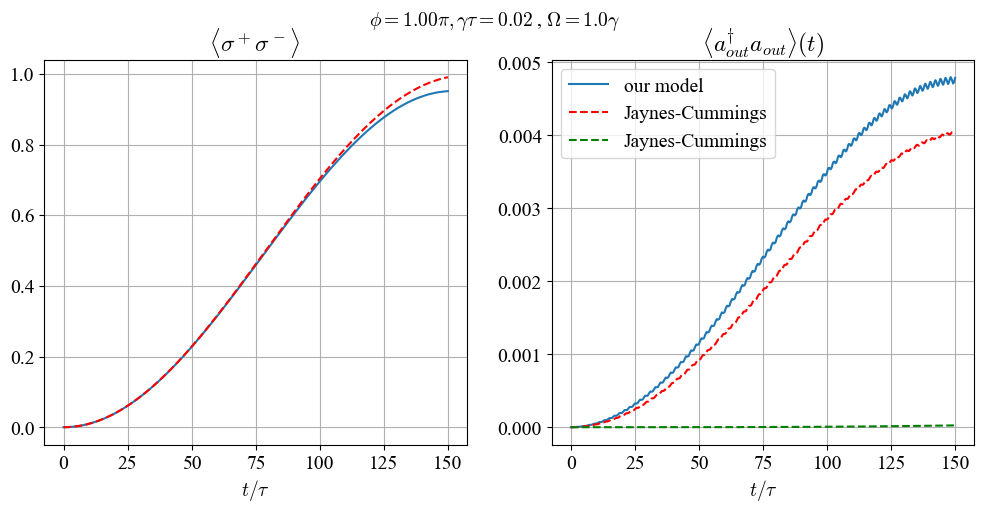

In [19]:
gamma = 0.02
tau = 1 
phi = np.pi
Omega = gamma

_=exp000(gamma,tau,phi,Omega)

## testing 

In [20]:
def exp001(gamma,tau,phi,Omega,plot=True):
	t_max = 150*tau
	dt = tau/150
	initial=[0,1]

	omega_1 = 0
	omega_2 = 2*np.pi
	g = np.sqrt(gamma/tau)
	t,e,a,s= run_simulation(gamma,tau,phi,Omega,t_max,dt,initial)
	I = observable(a,initial)
	exact5=two_modes_cavity(phi/tau,omega_1,omega_2, g,g,Omega,phi/tau,4,start_ground=True)
	pe_exact,m1,m2,mtot=exact5.evolve(t)

	if plot==True:
		fig,axs = plt.subplots(1,2,figsize=(12,5))

		axs[0].plot(t/tau,e,label='our model')
		axs[0].plot(t/tau,pe_exact,'r--',label='Jaynes-Cummings')
		axs[0].set_xlabel(r"$t/\tau $")
		axs[0].set_title(rf"$ \langle \sigma^+ \sigma^- \rangle $ ")
		axs[0].grid()

		axs[1].set_title(r"$ \langle a^{\dag}_{out}a_{out}\rangle(t) $")
		axs[1].plot(t/tau,I,label='our model')
		axs[1].plot(t/tau,m1+m2,'r--',label='Jaynes-Cummings')
		axs[1].plot(t/tau,mtot,'g--')
		axs[1].legend()
		axs[1].set_xlabel(r"$t/\tau $")
		axs[1].grid()

		fig.suptitle(rf"$\phi = {phi/np.pi:.2f} \pi, \gamma \tau = {gamma*tau:.2f}$ , $\Omega = {Omega/gamma:.1f} \gamma $", fontsize=14)

		plt.show()
	return t,e,a,s

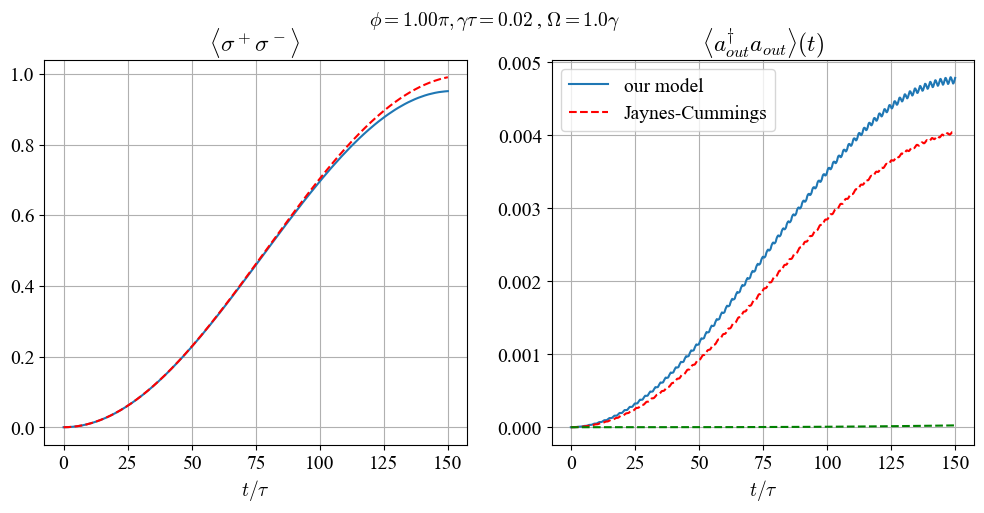

In [21]:
gamma = 0.02
tau = 1 
phi = np.pi
Omega = gamma

_=exp001(gamma,tau,phi,Omega)